## Examine and preparing data for Analysis 

In [194]:
# import libraries
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [195]:
# reading file into DataFrame
ri = pd.read_csv('datasets/police.csv')


In [196]:
ri.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [197]:
# checking number of missing values in columns
print(ri.isnull().sum())

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64


In [198]:
ri.shape

(91741, 15)

In [199]:
# checking the number of missing values in columns
ri.drop(['county_name', 'state'], axis = 'columns', inplace = True)

In [200]:
ri.shape

(91741, 13)

In [201]:
print(ri.isnull().sum())

stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64


In [202]:
ri.dropna(subset = ['driver_gender'], inplace = True)

In [203]:
print(ri.isnull().sum())

stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64


In [204]:
ri.shape

(86536, 13)

In [205]:
# checking the data types of values in each columns
ri.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

Data type of is_arrested should be bool not object

In [206]:
ri['is_arrested'] = ri.is_arrested.astype('bool')

In [207]:
print(ri['is_arrested'].dtype)

bool


In [208]:
combined = ri.stop_date.str.cat(ri.stop_time, sep = ' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.set_index('stop_datetime', inplace = True)
# To set datetime as index of our dataset we first combine the date and time columns then convert that column to
# datetime datatype and set it as index.

In [209]:
ri.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


We can see that stop_datetime has changed from column to index

## Exploring relation between genders and policing

**Do the genders commit different violations?**

In [210]:
# Before comparing violations being commited by each gender, we shouls examine the violations commited by all drivers.
print(ri.violation.value_counts())

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64


In [211]:
# expressing the count as proportions
ri.violation.value_counts(normalize = True)

Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64

More than half of all violations are for speeding, followed by other moving violations and equipment violations

The question we are trying to answer is wheter male and femal drivers tend to commit different types of traffic violations. So we need to create a DataFrame for each gender, and then analyze them seperately.

In [212]:
# Creating a Dataframe of female drivers
female = ri[ri.driver_gender == 'F']

# Creating a Dataframe of male drivers
male = ri[ri.driver_gender == 'M']

In [213]:
# Checking the violations by female drivers as proportions
female.violation.value_counts(normalize = True)

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64

In [214]:
# Checking the violations by female drivers as proportions
male.violation.value_counts(normalize = True)

Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64

About two-third of female traffic stops for speeding, whereasstops of male are more balanced among the six categories.This doesn't mean that females  speed more often than males , however, since we didn't take into account the number of stops or drivers. 

## Does Gender affect whose vehicle is searched ?

When a driver is pulled over for speeding, many people believe that gender has an impact on whether the driver will receive a ticket or a warning. Now we will see this

In [215]:
# Creating a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]

# Creating a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender == 'M') & (ri.violation == 'Speeding')]

In [216]:
female_and_speeding.stop_outcome.value_counts(normalize = True)

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64

In [217]:
male_and_speeding.stop_outcome.value_counts(normalize = True)

Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64

Interesting! The numbers are similar for males and females: about 95% of stops for speeding result in a ticket. Thus, the data fails to show that gender has an impact on who gets a ticket for speeding.

## Does gender affect whose vehicle is searched?

In [218]:
ri.search_conducted.dtype

dtype('bool')

In [219]:
# counting the search rate as proportions
ri.search_conducted.value_counts(normalize = True)

False    0.961785
True     0.038215
Name: search_conducted, dtype: float64

In [220]:
# calculating the search rate by taking the mean
ri.search_conducted.mean()

0.0382153092354627

It looks like the search rate is about 3.8%.

In [221]:
# calculating the search rate for female drivers
female.search_conducted.mean()

0.019180617481282074

In [222]:
# calculating the search rate for male drivers
male.search_conducted.mean()

0.04542557598546892

In [223]:
# calculating the search rate for both genders simultaneously
ri.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64

Even though the search rate for males is much higher than for females, it's possible that the difference is mostly due to a second factor.
For example, we might hypothesize that the search rate varies by violation type, and the difference in search rate between males and females is because they tend to commit different violations.
we can test this hypothesis by examining the search rate for each combination of gender and violation. If the hypothesis was true, we would find that males and females are searched at about the same rate for each violation.

In [224]:
# calculating the search rate for each combination of gender and violation
ri.groupby([ 'violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64

Wow! Male drivers are searched more than twice as often as female drivers. Why might this be?

 For all types of violations, the search rate is higher for males than for females, disproving our hypothesis.

## Does gender affect who is frisked during search?

During a vehicle search, the police officer may pat down the driver to check if they have a weapon. This is known as a "protective frisk."

In [225]:
ri.search_type.value_counts()

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

In [226]:
# creating new column 'frisk', True if "Productive Frisk" in 'search_type', False otherwise.
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na = False)

In [227]:
ri.frisk.dtype

dtype('bool')

In [228]:
ri.frisk.sum()

303

In [229]:
# Creating a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]
searched.frisk.mean()

0.09162382824312065

In [230]:
searched.groupby('driver_gender').frisk.mean()

driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64

 The frisk rate is higher for males than for females, though we can't conclude that this difference is caused by the driver's gender.

## Visual exploratory data analysis

**Does time of day affect arrest rate?**

When a police officer stops a driver, a small percentage of those stops ends in an arrest. Let's see if the arrest rate varies by time of day

In [231]:
# Calculating the overall arrest rate
ri.is_arrested.mean()

0.0355690117407784

In [232]:
# Calculating the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()
hourly_arrest_rate

stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64

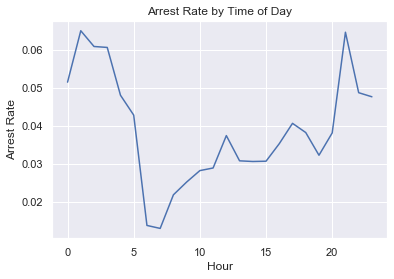

In [233]:
# line plot of 'hourly_arerst_rate'
hourly_arrest_rate.plot()
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')
plt.show()

We can see that arrest rate is higher at midnight and it decreases in early morining.

## Are drug-related stops on the rise?

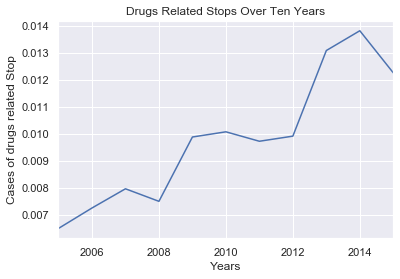

In [234]:
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()
annual_drug_rate.plot()
plt.xlabel('Years')
plt.ylabel('Cases of drugs related Stop')
plt.title('Drugs Related Stops Over Ten Years')
plt.show()

The rate of drug-related stops nearly doubled over the course of 10 years. Why might that be the case?

The rate of drug-related stops increased significantly between 2005 and 2015. We might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.
We can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then we'll see both rates increasing over time.

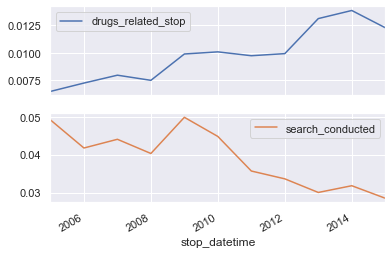

In [235]:
annual_search_rate = ri.search_conducted.resample('A').mean()
# concatenate 'anual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis = 'columns')
annual.plot(subplots = True)
plt.show()

The rate of drug-related_stops increased even though the search rate decreased, disproving our hypothesis.

## What violations are caught in each district?

The state of Rhode Island is broken into six police districts (zones). How do the zones compare in terms of what violations are caught by police?

In [236]:
# Creating a frequency table of districts and violations
all_zones = pd.crosstab(ri.district, ri.violation)
all_zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322
Zone X1,296,671,143,38,74,1119
Zone X3,2049,3086,769,671,820,8779
Zone X4,3541,5353,1560,1411,843,9795


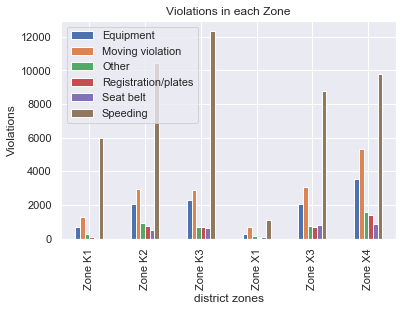

In [237]:
all_zones.plot(kind = 'bar')
plt.legend(loc = 'upper left')
plt.xlabel('district zones')
plt.ylabel('Violations')
plt.title('Violations in each Zone')
plt.show()

## How long does a driver stopped for a violation?

In [238]:
print(ri.stop_duration.unique())

['0-15 Min' '16-30 Min' '30+ Min']


In [239]:
# Creating a dictionary that maps strings to integers
mapping = {'0-15 Min': 8, '16-30 Min': 23, '30+ Min': 45}

In [240]:
# Converting the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)
print(ri.stop_minutes.unique())

[ 8 23 45]


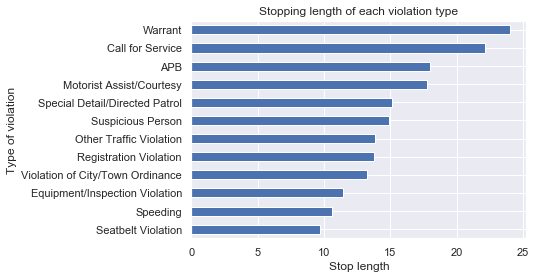

In [241]:
# the mean 'stop_minutes' for each value in 'violation_raw'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

# Sorting 'stop_length' by its values and creating a horizontal bar plot
stop_length.sort_values().plot(kind = 'barh')
plt.xlabel('Stop length')
plt.ylabel('Type of violation')
plt.title('Stopping length of each violation type')
plt.show()

## Analyzing the effect of weather on policing

We will explore the impact of weather conditions on police behavior during traffic stops.

In [242]:
weather = pd.read_csv('datasets/weather.csv')
weather.head()

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


In [243]:
weather[['TMIN', 'TAVG', 'TMAX']].describe()

,TMIN,TAVG,TMAX
count,4017.000000,1217.000000,4017.000000
mean,43.484441,52.493016,61.268608
std,17.020298,17.830714,18.199517
min,-5.000000,6.000000,15.000000
25%,30.000000,39.000000,47.000000
50%,44.000000,54.000000,62.000000
75%,58.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


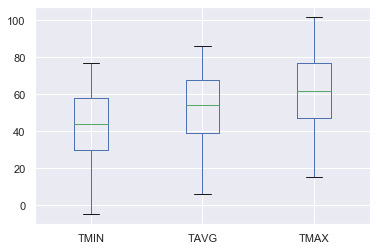

In [244]:
# Creating a box plot of the temperature columns
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind = 'box')
plt.show()

In [245]:
# Creating a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather.TMAX - weather.TMIN
weather.TDIFF.describe()

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64

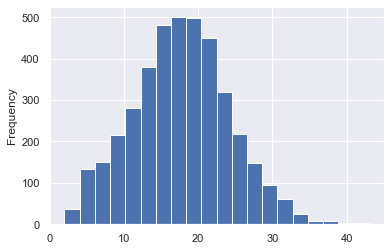

In [246]:
# Creating a histogram with 20 bins to visualize 'TDIFF'
weather.TDIFF.plot(kind = 'hist', bins = 20)
plt.show()

# Categorize the weather

The weather DataFrame contains 20 columns that start with 'WT', each of which represents a bad weather condition. For example:

* WT05 indicates "Hail"
* WT11 indicates "High or damaging winds"
* WT17 indicates "Freezing rain"

For every row in the dataset, each WT column contains either a 1 (meaning the condition was present that day) or NaN (meaning the condition was not present).

In [247]:
# Copying'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:, 'WT01':'WT22']

In [248]:
# Calculating the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis = 'columns')

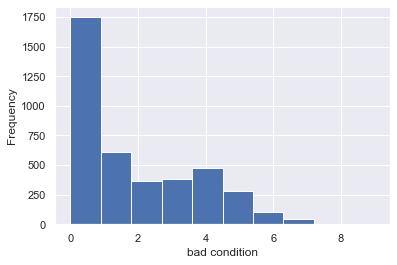

In [249]:
# Replacing missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Creating a histogram to visualize 'bad_conditions'
weather.bad_conditions.plot(kind = 'hist')
plt.xlabel('bad condition')
plt.show()

It looks like many days didn't have any bad weather conditions, and only a small portion of days had more than four bad weather conditions.

The counts range from 0 to 9, and should be converted to ratings as follows:

* Convert 0 to 'good'
* Convert 1 through 4 to 'bad'
* Convert 5 through 9 to 'worse'

In [250]:
# Counting the unique values in 'bad_conditions' and sorting the index
weather.bad_conditions.value_counts().sort_index()

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64

In [251]:
# Creating a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

# Converting the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Counting the unique values in 'rating'
print(weather.rating.value_counts())

bad      1836
good     1749
worse     432
Name: rating, dtype: int64


In [252]:
from pandas.api.types import CategoricalDtype

# creating a list of weather ratings in logical order
cats = ['good', 'bad', 'worse']

# changing the data type of 'rating' to category
weather['rating'] = weather.rating.astype(CategoricalDtype(categories=cats))
print(weather.rating.head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): [good, bad, worse]


## Merging datasets

In [253]:
# reseting the index of 'ri'
ri.reset_index(inplace=True)

ri.head()

,stop_datetime,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,frisk,stop_minutes
0,2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8
1,2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,8
2,2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8
3,2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False,23
4,2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False,8


In [254]:
# creating a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE', 'rating']]

print(weather_rating.head())

         DATE rating
0  2005-01-01    bad
1  2005-01-02    bad
2  2005-01-03    bad
3  2005-01-04    bad
4  2005-01-05    bad


In [255]:
ri.shape

(86536, 16)

In [256]:
# merging 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

In [257]:
ri_weather.shape

(86536, 18)

## Does weather affect the arrest rate? 

Do police officers arrest drivers more often when the weather is bad?

* First, we'll calculate the overall arrest rate.
* Then, we'll calculate the arrest rate for each of the weather ratings you previously assigned.
* Finally, we'll add violation type as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

Since we previously defined a logical order for the weather categories, good < bad < worse, they will be sorted that way in the results.

In [258]:
# calculating the overall arrest rate
print(ri_weather.is_arrested.mean())

0.0355690117407784


In [259]:
# calculating the arrest rate for each 'rating'
print(ri_weather.groupby('rating').is_arrested.mean())

rating
good     0.033715
bad      0.036261
worse    0.041667
Name: is_arrested, dtype: float64


In [260]:
# calculating the arrest rate for each 'violation' and 'rating'
print(ri_weather.groupby(['violation', 'rating']).is_arrested.mean())

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


The output of a single .groupby() operation on multiple columns is a Series with a MultiIndex. Working with this type of object is similar to working with a DataFrame:

* The outer index level is like the DataFrame rows.
* The inner index level is like the DataFrame columns.

We'll access data from a multi-indexed Series using the .loc[] accessor.

In [261]:
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

print(arrest_rate)

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


In [262]:
# printing the arrest rate for moving violations in bad weather
print(arrest_rate.loc['Moving violation', 'bad'])

0.05804964058049641


In [263]:
# printing the arrest rates for speeding violations in all three weather conditions
print(arrest_rate.loc['Speeding'])

rating
good     0.013405
bad      0.013314
worse    0.016886
Name: is_arrested, dtype: float64


In [264]:
# unstacking the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack())

rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076966  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013405  0.013314  0.016886


In [265]:
# creating the same DataFrame using a pivot table
print(ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))

rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076966  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013405  0.013314  0.016886
